In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [7]:
card_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Amount', ylabel='Density'>

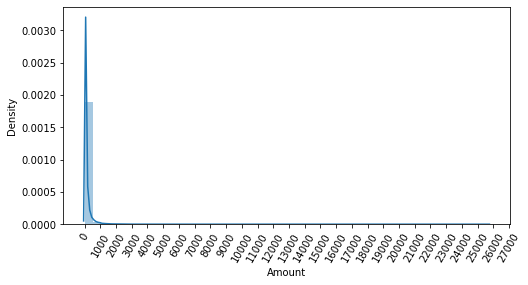

In [8]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

## train

In [9]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [10]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

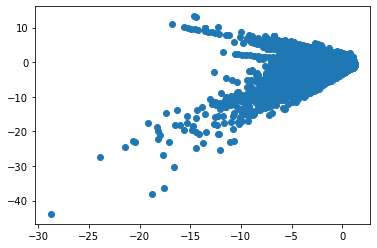

In [11]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정.

scaler=StandardScaler()
X_scaled=scaler.fit(X_train).transform(X_train)
X_scaled_d=scaler.fit_transform(X_train)

X_test_scaled=scaler.transform(X_test)

plt.scatter(X_scaled[:,0],X_scaled[:,1])

In [12]:

print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


## XGboost, LGBM

In [13]:
import xgboost

print(xgboost.__version__)

1.3.3


In [14]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test_scaled, y_test)]
xgb_wrapper.fit(X_scaled_d, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test_scaled)

[0]	validation_0-logloss:0.59835
[1]	validation_0-logloss:0.52083
[2]	validation_0-logloss:0.45608
[3]	validation_0-logloss:0.40135
[4]	validation_0-logloss:0.35471
[5]	validation_0-logloss:0.31441
[6]	validation_0-logloss:0.27953
[7]	validation_0-logloss:0.24911
[8]	validation_0-logloss:0.22243
[9]	validation_0-logloss:0.19898
[10]	validation_0-logloss:0.17830
[11]	validation_0-logloss:0.15995
[12]	validation_0-logloss:0.14368
[13]	validation_0-logloss:0.12922
[14]	validation_0-logloss:0.11630
[15]	validation_0-logloss:0.10478
[16]	validation_0-logloss:0.09450
[17]	validation_0-logloss:0.08527
[18]	validation_0-logloss:0.07703
[19]	validation_0-logloss:0.06963
[20]	validation_0-logloss:0.06299
[21]	validation_0-logloss:0.05702
[22]	validation_0-logloss:0.05166
[23]	validation_0-logloss:0.04685
[24]	validation_0-logloss:0.04251
[25]	validation_0-logloss:0.03860
[26]	validation_0-logloss:0.03509
[27]	validation_0-logloss:0.03193
[28]	validation_0-logloss:0.02908
[29]	validation_0-loglos

[238]	validation_0-logloss:0.00279
[239]	validation_0-logloss:0.00279
[240]	validation_0-logloss:0.00278
[241]	validation_0-logloss:0.00278
[242]	validation_0-logloss:0.00279
[243]	validation_0-logloss:0.00278
[244]	validation_0-logloss:0.00279
[245]	validation_0-logloss:0.00279
[246]	validation_0-logloss:0.00279
[247]	validation_0-logloss:0.00279
[248]	validation_0-logloss:0.00279
[249]	validation_0-logloss:0.00279
[250]	validation_0-logloss:0.00278
[251]	validation_0-logloss:0.00279
[252]	validation_0-logloss:0.00279
[253]	validation_0-logloss:0.00279
[254]	validation_0-logloss:0.00279
[255]	validation_0-logloss:0.00279
[256]	validation_0-logloss:0.00279
[257]	validation_0-logloss:0.00279
[258]	validation_0-logloss:0.00278
[259]	validation_0-logloss:0.00279
[260]	validation_0-logloss:0.00279
[261]	validation_0-logloss:0.00278
[262]	validation_0-logloss:0.00279
[263]	validation_0-logloss:0.00279
[264]	validation_0-logloss:0.00279
[265]	validation_0-logloss:0.00279
[266]	validation_0-l

In [17]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

confusion = confusion_matrix( y_test, ws100_preds)
accuracy = accuracy_score(y_test , ws100_preds)
precision = precision_score(y_test , ws100_preds)
recall = recall_score(y_test , ws100_preds)
f1 = f1_score(y_test,ws100_preds)
roc_auc = roc_auc_score(y_test, ws100_preds)
print('오차 행렬')
print(confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))



오차 행렬
[[85289     6]
 [   41   107]]
정확도: 0.9994, 정밀도: 0.9469, 재현율: 0.7230,F1: 0.8199, AUC:0.8615


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

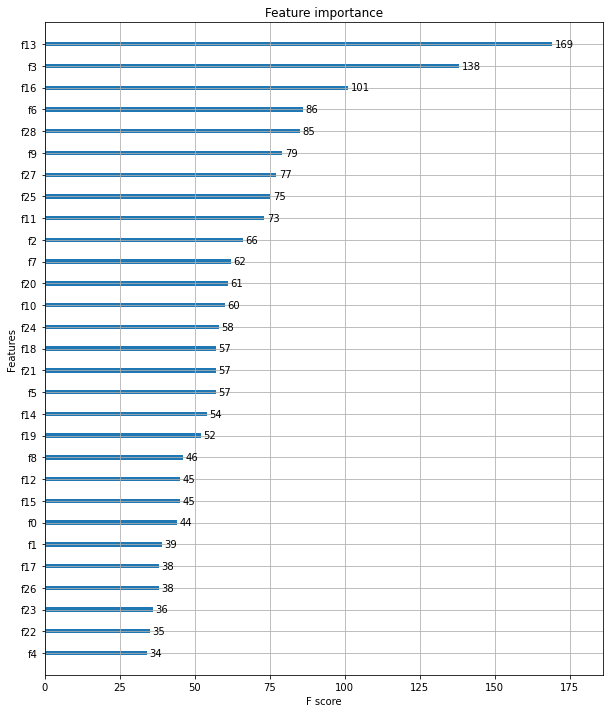

In [18]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax)

## LGBM

In [20]:
conda install -c conda-forge lightgbm

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\YEONWOO\anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa244fe_3         3.1 MB  conda-forge
    lightgbm-3.2.1             |   py38h885f38d_0         889 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.9 MB

The following NEW packages will be INSTALLED:

  lightgbm           conda-forge/win-64::lightgbm-3.2.1-py38h885f38d_0
  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.3-py38haa95532_0 --> conda-forge::conda-4.10.3-py38haa244fe_3




cond

In [21]:
import lightgbm

print(lightgbm.__version__)

3.2.1


In [27]:

from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(X_scaled_d, y_test)]
lgbm_wrapper.fit(X_scaled_d, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test_scaled)

#Length of label is not same with #data 이라는 오류가 무엇인가요??

LightGBMError: Length of label is not same with #data

## 하이퍼파라미터 튜닝

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

card_df = pd.read_csv("./creditcard.csv",encoding='latin-1')
print('dataset shape:', card_df.shape)
card_df.head(3)

dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [ ]:

from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음. 
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_scaled_d, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_scaled_d, y_train), (X_test_scaled, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_val, gridcv.predict_proba(X_val)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.89376	validation_1-auc:0.84778
[1]	validation_0-auc:0.92570	validation_1-auc:0.90849
[2]	validation_0-auc:0.92571	validation_1-auc:0.90853
[3]	validation_0-auc:0.92715	validation_1-auc:0.90851
[4]	validation_0-auc:0.92853	validation_1-auc:0.90842
[5]	validation_0-auc:0.93118	validation_1-auc:0.90809
[6]	validation_0-auc:0.93255	validation_1-auc:0.91135
[7]	validation_0-auc:0.93602	validation_1-auc:0.91344
[8]	validation_0-auc:0.93754	validation_1-auc:0.91349
[9]	validation_0-auc:0.93896	validation_1-auc:0.91337
[10]	validation_0-auc:0.95494	validation_1-auc:0.92819
[11]	validation_0-auc:0.96807	validation_1-auc:0.95083
[12]	validation_0-auc:0.97286	validation_1-auc:0.95501
[13]	validation_0-auc:0.97269	validation_1-auc:0.95491
[14]	validation_0-auc:0.97260	validation_1-auc:0.95427
[15]	validation_0-auc:0.97649	validation_1-auc:0.95377
[16]	validation_0-auc:0.97654	validation_1-auc:0.95377
[17]	validation_0-auc:0.97812	validation_1-auc:0.95654
[18]	validation_0-au

[37]	validation_0-auc:0.99452	validation_1-auc:0.97799
[38]	validation_0-auc:0.99426	validation_1-auc:0.97825
[39]	validation_0-auc:0.99479	validation_1-auc:0.97825
[40]	validation_0-auc:0.99504	validation_1-auc:0.97803
[41]	validation_0-auc:0.99533	validation_1-auc:0.97859
[42]	validation_0-auc:0.99503	validation_1-auc:0.97731
[43]	validation_0-auc:0.99502	validation_1-auc:0.97680
[44]	validation_0-auc:0.99468	validation_1-auc:0.97764
[45]	validation_0-auc:0.99473	validation_1-auc:0.97770
[46]	validation_0-auc:0.99479	validation_1-auc:0.97830
[47]	validation_0-auc:0.99471	validation_1-auc:0.97826
[48]	validation_0-auc:0.99490	validation_1-auc:0.97810
[49]	validation_0-auc:0.99552	validation_1-auc:0.97804
[50]	validation_0-auc:0.99562	validation_1-auc:0.97832
[51]	validation_0-auc:0.99563	validation_1-auc:0.97832
[52]	validation_0-auc:0.99557	validation_1-auc:0.97851
[53]	validation_0-auc:0.99550	validation_1-auc:0.97904
[0]	validation_0-auc:0.89520	validation_1-auc:0.85115
[1]	validat

[18]	validation_0-auc:0.98140	validation_1-auc:0.96280
[19]	validation_0-auc:0.98146	validation_1-auc:0.96291
[20]	validation_0-auc:0.98878	validation_1-auc:0.97142
[21]	validation_0-auc:0.98980	validation_1-auc:0.96765
[22]	validation_0-auc:0.98959	validation_1-auc:0.96976
[23]	validation_0-auc:0.98984	validation_1-auc:0.97618
[24]	validation_0-auc:0.99281	validation_1-auc:0.97776
[25]	validation_0-auc:0.99392	validation_1-auc:0.98037
[26]	validation_0-auc:0.99387	validation_1-auc:0.97869
[27]	validation_0-auc:0.99435	validation_1-auc:0.97958
[28]	validation_0-auc:0.99418	validation_1-auc:0.98130
[29]	validation_0-auc:0.99388	validation_1-auc:0.98108
[30]	validation_0-auc:0.99347	validation_1-auc:0.98277
[31]	validation_0-auc:0.99345	validation_1-auc:0.98341
[32]	validation_0-auc:0.99336	validation_1-auc:0.98277
[33]	validation_0-auc:0.99308	validation_1-auc:0.98227
[34]	validation_0-auc:0.99336	validation_1-auc:0.98256
[35]	validation_0-auc:0.99434	validation_1-auc:0.98268
[36]	valid

[44]	validation_0-auc:0.99375	validation_1-auc:0.97753
[45]	validation_0-auc:0.99377	validation_1-auc:0.97717
[46]	validation_0-auc:0.99385	validation_1-auc:0.97627
[47]	validation_0-auc:0.99356	validation_1-auc:0.97667
[48]	validation_0-auc:0.99361	validation_1-auc:0.97726
[49]	validation_0-auc:0.99348	validation_1-auc:0.97661
[50]	validation_0-auc:0.99361	validation_1-auc:0.97671
[51]	validation_0-auc:0.99393	validation_1-auc:0.97752
[52]	validation_0-auc:0.99389	validation_1-auc:0.97661
[53]	validation_0-auc:0.99373	validation_1-auc:0.97556
[54]	validation_0-auc:0.99376	validation_1-auc:0.97544
[55]	validation_0-auc:0.99369	validation_1-auc:0.97473
[56]	validation_0-auc:0.99385	validation_1-auc:0.97473
[57]	validation_0-auc:0.99398	validation_1-auc:0.97386
[58]	validation_0-auc:0.99393	validation_1-auc:0.97412
[59]	validation_0-auc:0.99404	validation_1-auc:0.97403
[60]	validation_0-auc:0.99405	validation_1-auc:0.97384
[61]	validation_0-auc:0.99389	validation_1-auc:0.97383
[62]	valid

[48]	validation_0-auc:0.99832	validation_1-auc:0.97891
[49]	validation_0-auc:0.99817	validation_1-auc:0.97948
[50]	validation_0-auc:0.99817	validation_1-auc:0.97923
[51]	validation_0-auc:0.99801	validation_1-auc:0.97967
[52]	validation_0-auc:0.99807	validation_1-auc:0.97917
[53]	validation_0-auc:0.99800	validation_1-auc:0.97962
[54]	validation_0-auc:0.99808	validation_1-auc:0.97989
[55]	validation_0-auc:0.99823	validation_1-auc:0.98002
[0]	validation_0-auc:0.89378	validation_1-auc:0.84778
[1]	validation_0-auc:0.92570	validation_1-auc:0.90848
[2]	validation_0-auc:0.92572	validation_1-auc:0.90852
[3]	validation_0-auc:0.92717	validation_1-auc:0.91191
[4]	validation_0-auc:0.92854	validation_1-auc:0.91182
[5]	validation_0-auc:0.93120	validation_1-auc:0.91150
[6]	validation_0-auc:0.93120	validation_1-auc:0.91148
[7]	validation_0-auc:0.93609	validation_1-auc:0.91360
[8]	validation_0-auc:0.93608	validation_1-auc:0.91353
[9]	validation_0-auc:0.93750	validation_1-auc:0.91343
[10]	validation_0-au

[33]	validation_0-auc:0.99313	validation_1-auc:0.98008
[34]	validation_0-auc:0.99325	validation_1-auc:0.97939
[35]	validation_0-auc:0.99435	validation_1-auc:0.98030
[36]	validation_0-auc:0.99420	validation_1-auc:0.98081
[37]	validation_0-auc:0.99425	validation_1-auc:0.98001
[38]	validation_0-auc:0.99468	validation_1-auc:0.97976
[39]	validation_0-auc:0.99472	validation_1-auc:0.97908
[40]	validation_0-auc:0.99492	validation_1-auc:0.97824
[41]	validation_0-auc:0.99485	validation_1-auc:0.97817
[42]	validation_0-auc:0.99450	validation_1-auc:0.97854
[43]	validation_0-auc:0.99435	validation_1-auc:0.97824
[44]	validation_0-auc:0.99458	validation_1-auc:0.97940
[45]	validation_0-auc:0.99467	validation_1-auc:0.97928
[46]	validation_0-auc:0.99485	validation_1-auc:0.97906
[47]	validation_0-auc:0.99473	validation_1-auc:0.97870
[48]	validation_0-auc:0.99467	validation_1-auc:0.97853
[49]	validation_0-auc:0.99502	validation_1-auc:0.97860
[50]	validation_0-auc:0.99513	validation_1-auc:0.97889
[51]	valid

[75]	validation_0-auc:0.99903	validation_1-auc:0.98049
[76]	validation_0-auc:0.99901	validation_1-auc:0.98028
[77]	validation_0-auc:0.99900	validation_1-auc:0.98046
[78]	validation_0-auc:0.99898	validation_1-auc:0.98061
[79]	validation_0-auc:0.99903	validation_1-auc:0.98074
[80]	validation_0-auc:0.99901	validation_1-auc:0.98069
[81]	validation_0-auc:0.99902	validation_1-auc:0.98059
[82]	validation_0-auc:0.99900	validation_1-auc:0.98063
[83]	validation_0-auc:0.99904	validation_1-auc:0.98054
[84]	validation_0-auc:0.99901	validation_1-auc:0.98046
[85]	validation_0-auc:0.99907	validation_1-auc:0.98045
[86]	validation_0-auc:0.99909	validation_1-auc:0.98068
[87]	validation_0-auc:0.99910	validation_1-auc:0.98076
[88]	validation_0-auc:0.99913	validation_1-auc:0.98072
[89]	validation_0-auc:0.99911	validation_1-auc:0.98072
[90]	validation_0-auc:0.99909	validation_1-auc:0.98070
[91]	validation_0-auc:0.99908	validation_1-auc:0.98072
[92]	validation_0-auc:0.99907	validation_1-auc:0.98083
[93]	valid

[4]	validation_0-auc:0.92689	validation_1-auc:0.91160
[5]	validation_0-auc:0.93107	validation_1-auc:0.91128
[6]	validation_0-auc:0.93246	validation_1-auc:0.91122
[7]	validation_0-auc:0.93348	validation_1-auc:0.91405
[8]	validation_0-auc:0.93600	validation_1-auc:0.91343
[9]	validation_0-auc:0.93600	validation_1-auc:0.91343
[10]	validation_0-auc:0.95213	validation_1-auc:0.92811
[11]	validation_0-auc:0.96590	validation_1-auc:0.95099
[12]	validation_0-auc:0.97064	validation_1-auc:0.95468
[13]	validation_0-auc:0.97745	validation_1-auc:0.95966
[14]	validation_0-auc:0.97744	validation_1-auc:0.96044
[15]	validation_0-auc:0.98064	validation_1-auc:0.96324
[16]	validation_0-auc:0.98056	validation_1-auc:0.96289
[17]	validation_0-auc:0.98028	validation_1-auc:0.96215
[18]	validation_0-auc:0.98542	validation_1-auc:0.95951
[19]	validation_0-auc:0.98519	validation_1-auc:0.96000
[20]	validation_0-auc:0.98666	validation_1-auc:0.96674
[21]	validation_0-auc:0.99082	validation_1-auc:0.96863
[22]	validation_

[24]	validation_0-auc:0.99628	validation_1-auc:0.98067
[25]	validation_0-auc:0.99685	validation_1-auc:0.98005
[26]	validation_0-auc:0.99742	validation_1-auc:0.98102
[27]	validation_0-auc:0.99761	validation_1-auc:0.97882
[28]	validation_0-auc:0.99761	validation_1-auc:0.98051
[29]	validation_0-auc:0.99749	validation_1-auc:0.98163
[30]	validation_0-auc:0.99777	validation_1-auc:0.98368
[31]	validation_0-auc:0.99813	validation_1-auc:0.98276
[32]	validation_0-auc:0.99813	validation_1-auc:0.98186
[33]	validation_0-auc:0.99814	validation_1-auc:0.98117
[34]	validation_0-auc:0.99857	validation_1-auc:0.98057
[35]	validation_0-auc:0.99847	validation_1-auc:0.98015
[36]	validation_0-auc:0.99870	validation_1-auc:0.97912
[37]	validation_0-auc:0.99903	validation_1-auc:0.97865
[38]	validation_0-auc:0.99906	validation_1-auc:0.97715
[39]	validation_0-auc:0.99919	validation_1-auc:0.97672
[40]	validation_0-auc:0.99910	validation_1-auc:0.97546
[41]	validation_0-auc:0.99904	validation_1-auc:0.97820
[42]	valid